# South African Language Identification Hackathon 2022

# Author:Peter Selolo

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/800px-Flag_of_South_Africa.svg.png" width="400" height="200" alt="Drawing" style="float: right;"/>


<h3>Table_of_Content</h3>

[<h5>1.Introduction</h5>](#Introduction)

[<h5>2.Problem Statement</h5>](#Problem_Statement)

[<h5>3.Importing Packages</h5>](#Importing_Packages)

[<h5>4.Loading the data</h5>](#Loading_the_data)

[<h5>5.Exploratory data analysis</h5>](#Exploratory_data_analysis)

[<h5>6.Data cleaning and Feature engineering</h5>](#Data_cleaning_and_Feature_engineering)

[<h5>7.Modeling</h5>](#.Modeling)

[<h5>8.Model Performance</h5>](#Model_Performance)

[<h5>9.Model Explanation</h5>](#Model_Explanation)

[<h5>10.Conclussion</h5>](#Conclussion)


<h3>Introduction</h3>

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
Challenges arise when a speaker is trying to address someone in a language they dont understand.

Solution to this kind of problem would be translation by another person who understand multiple languages,but that can still be a challenge of mastering and being fluent in multiple languages.
Machines have always proved to outperform mankind in many activities.Machines can be trained to perform duties on our behalf.

So i will be developing a machine learning model to determine in which of the South African languages the piece of text is written in.

<img style="float: right" src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media" width="400" height="200" alt="Drawing" style="float: right;"/>

<h3>Problem_Statement</h3>

Use natural language processing  identification to develop a model that will take text which is in any of South Africa's 11 Official languages and identify which language the text is in.
The model should perform the task of "determining the natural language that a piece of text is written in."

<h3>Importing_Packages</h3>

In [196]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

#libraries for language,datacleaning and preprocessing libraries
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
import nltk
from nltk.corpus import stopwords
import string
import nltk
import re
import string

#Modelling and feature engineering libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score







<h3>Loading_the_data</h3>

In [9]:
#loading the train dataset
df_train = pd.read_csv('train_set.csv')
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [21]:
#loading the test dataset
df_test=pd.read_csv('test_set.csv')
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [20]:
#loading the submission file
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,index,lang_id
0,1,tsn
1,2,nbl


<h3>Exploratory_data_analysis</h3>

In [13]:
#checking the shape of the dataset 

In [11]:
df_train.shape

(33000, 2)

In [12]:
df_test.shape

(5682, 2)

the train dataset is made up of 33000 raws whereas the dataset consist of only 5682 raws and 2 columns

In [14]:
#checking the datatypes in each of the dataset

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


from the given data sets we have two types which are numeric and categorical

In [ ]:
#Now we will be performing our analysis with only the train dataset since it the one that will be used to train our model

In [46]:
#checking for nulls is the text feature
df_train['text'].isnull().sum()

0

In [47]:
#checking fro nulls in the lang_id feature
df_train['lang_id'].isnull().sum()

0

it appears that there are no nulls in our given features

In [37]:
#check for unique featues
df_train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

there are eleven langauges in the given data

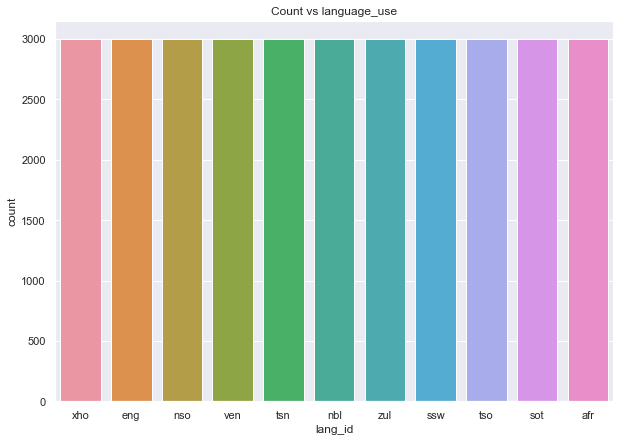

In [41]:
#Now lets see how often they are used

sns.set(rc={'figure.figsize':(10,7)})
ax=sns.countplot(x=df_train['lang_id'], data=df_train)
plt.title("Count vs language_use")
plt.show()

all langauges appear to be used equally.meaning that there is a balance 

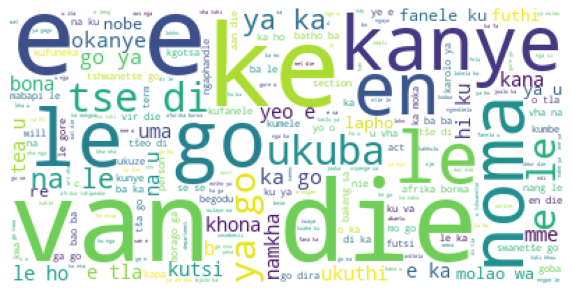

In [57]:
#creating a word cloud to for text
words = " ".join(df_train['text'])

wc = WordCloud(background_color='white')
img = wc.generate(words)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()


from our EDA we observed that our data is balanced and is in a good format,so there is not much of data cleaning required 

<h3>Data_cleaning_and_Feature_engineering</h3>

<h6>data cleaning</h6>

In [71]:
#this function removes punctuation and numbers 
def remove_punctuation(text):
    punct= string.punctuation
    text= " ".join([k for k in text if k not in punct])
    text=re.sub('[0-9]+', '', text)
    return text

#this function coverts the letters to lowercase
def to_lower(text):
    return text.lower()

#remove stopwords
def remove_stop_words(text):    
    return ' '.join([t for t in text.split() if t not in stopwords.words('english')])

In [77]:
#applying the data cleaning functions to our train data set
df_train["cleaned_text"]=df_train["text"].apply(remove_numbers)
df_train["cleaned_text"]=df_train["text"].apply(remove_punctuation)
df_train["cleaned_text"]=df_train["text"].apply(to_lower)
df_train["cleaned_text"]=df_train["text"].apply(remove_stop_words)

<h6>feature engineering<h6>

In [179]:
#select the feature and the target variable
X = df_train['cleaned_text']
y = df_train['lang_id']

In [180]:
# Split Data (into Training & Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [181]:
countvectorizer = CountVectorizer()

X_train_CV = countvectorizer.fit_transform(X_train)
X_test_CV = countvectorizer.transform(X_test)

<h3>Modeling</h3>

<h6>Models used:</h6>

* Logistic Regression

* Random Forest Classifier

* KNeighbhors Classifier

* Naive Bayes MultinomialNB classifier

* Stochastic Gradient Descent

* linear Support Vector Classifier

* RBF Support Vector Classifier

In [252]:
#models
lrm = LogisticRegression(max_iter=1000, random_state=42)
rfc = RandomForestClassifier(random_state = 42)
knn = KNeighborsClassifier()
naive_bayes = MultinomialNB()
sgd = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)
svc1= SVC(kernel='linear')
svc2= SVC(kernel='rbf')

In [253]:
#model fitting
lrm.fit(X_train_CV, y_train)
rfc.fit(X_train_CV, y_train)
knn.fit(X_train_CV, y_train)
naive_bayes.fit(X_train_CV, y_train)
sgd.fit(X_train_CV, y_train)
svc1.fit(X_train_CV, y_train)
svc2.fit(X_train_CV, y_train)


SVC()

In [254]:
#predictions
lrm_pred = clf.predict(X_test_CV)
rfc_pred =rfc.predict(X_test_CV)
knn_pred = knn.predict(X_test_CV)
naive_pred= naive_bayes.predict(X_test_CV)
sgd_pred = sgd.predict(X_test_CV)
svc1_pred=svc1.predict(X_test_CV)
svc2_pred=svc2.predict(X_test_CV)


<h3>Model_Performance</h3>

In [ ]:
#f1 score is calculated for each model to see how it performs

In [256]:
#LogisticRegression
f1_lrm = f1_score(y_test,lrm_pred, average = 'weighted')
print("The f1_score of the knn model is: {}".format(f1_lrm))

#KNeighborsClassifier
f1_knn = f1_score(y_test,knn_pred, average = 'weighted')
print("The f1_score of the knn model is: {}".format(f1_knn))

#RandomForestClassifier
f1_rfc= f1_score(y_test, rfc_pred, average = 'weighted')
print("The f1_score of the random forest model is: {}".format(f1_rfc))

#NaiveBayes
f1_naive = f1_score(y_test, naive_pred, average = 'weighted')
print("The f1_score of the naive baye model is: {}".format(f1_naive))

#Stochastic Gradient Descent
f1_sgd = f1_score(y_test, sgd_pred, average = 'weighted')
print("The f1_score of the stochastic gradient descent model is: {}".format(f1_sgd))

#linearSupportVectorClassifier
f1_svc1 = f1_score(y_test, svc1_pred, average = 'weighted')
print("The f1_score of the linear support vector classifier model is: {}".format(f1_svc1))

#RBFSupportVectorClassifier
f1_svc2 = f1_score(y_test, svc2_pred, average = 'weighted')
print("The f1_score of the rbf support vector classifier model is: {}".format(f1_svc2))



The f1_score of the knn model is: 0.9865023155013137
The f1_score of the knn model is: 0.7860435962348066
The f1_score of the random forest model is: 0.9865023155013137
The f1_score of the naive model is: 0.999696973605302
The f1_score of the sgd model is: 0.988599664541107
The f1_score of the svc1 model is: 0.995760002383234
The f1_score of the svc2 model is: 0.9945549926684009


from the f1-scores scores it can be observed that the naive bayes model is having a higher score as compared to other models

In [262]:
Model_scores = {'Model_Name':['Logistic Regression', 'Random Forest Classifier','KNeighbors Classifier','Naive Bayes',
                              'Stochastic Gradient Classifier',
                        'linear Support Vector Classifier','RBF Support Vector Classifier'],
                    'f1-scores':[f1_lrm,f1_knn,f1_rfc,f1_naive,f1_sgd,f1_svc1,f1_svc2]}
df= pd.DataFrame(Model_scores)
df

,Model_Name,f1-scores
0,Logistic Regression,0.986502
1,Random Forest Classifier,0.786044
2,KNeighbors Classifier,0.986502
3,Naive Bayes,0.999697
4,Stochastic Gradient Classifier,0.988600
5,linear Support Vector Classifier,0.995760
6,RBF Support Vector Classifier,0.994555


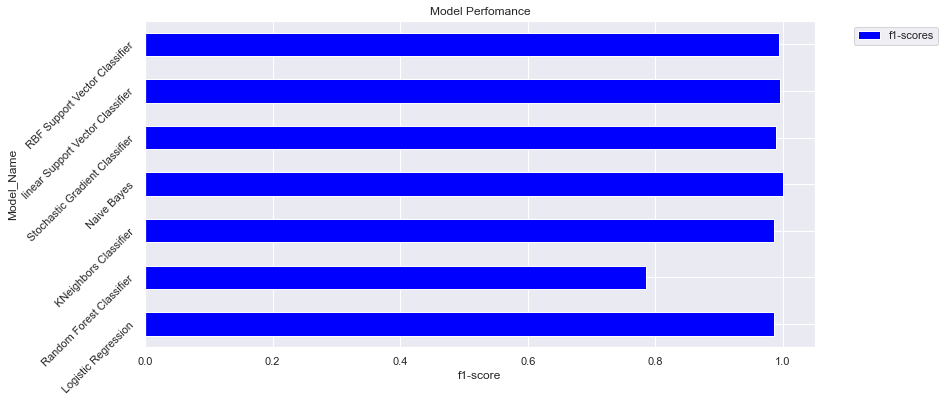

In [263]:
df.set_index(df['Model_Name'], inplace = True)
df.drop(['Model_Name'],axis = 1)
df.plot(kind='barh', figsize = (12,6),colormap='winter')
plt.xlabel('f1-score')
plt.yticks(rotation = 45)
plt.title('Model Perfomance')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

<h3>Model_Explanation</h3>

<h3>Conclussion</h3>

<h5>kaggle submission</h5>

In [264]:
#applying the data cleaning functions to our test data set
df_test["cleaned_text"]=df_test["text"].apply(remove_numbers)
df_test["cleaned_text"]=df_test["text"].apply(remove_punctuation)
df_test["cleaned_text"]=df_test["text"].apply(to_lower)
df_test["cleaned_text"]=df_test["text"].apply(remove_stop_words)

In [265]:
test_features =df_test['cleaned_text']

In [266]:
test_CV = countvectorizer.transform(test_features)

In [267]:
prediction = naive_bayes.predict(test_CV)

In [268]:
submission = pd.DataFrame(list(zip(df_test['index'], prediction)), columns=['index', 'lang_id'])

In [269]:
submission.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


In [234]:
#convert to csv file
submission.to_csv('submission8.csv', index=False, index_label=False)

[<h5>THE END!!!!!  Back to table of content</h5>](#Table_of_Content)